In [2]:
!pip install datasets

  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2024.9.0-py3-none-any.whl (179 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0


In [8]:
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")


In [10]:
ds.data

{'train': MemoryMappedTable
 sentiment: string
 comment: string
 ----
 sentiment: [["not nostalgia","nostalgia","nostalgia","not nostalgia","nostalgia",...,"nostalgia","not nostalgia","not nostalgia","nostalgia","not nostalgia"],["not nostalgia","nostalgia","not nostalgia","nostalgia","not nostalgia",...,"not nostalgia","not nostalgia","not nostalgia","nostalgia","nostalgia"]]
 comment: [["He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.","The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel","I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my littl

In [54]:
# import pandas as pd
# df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

# sentiments=['not nostalgia','nostalgia']

# df['sentiments'] = [0 if s == sentiments[0] else 1 for s in df['sentiment']]
# df

,sentiment,comment,sentiments
0,not nostalgia,He was a singer with a golden voice that I lov...,0
1,nostalgia,The mist beautiful voice ever I listened to hi...,1
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,1
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,0
4,nostalgia,listening to his songs reminds me of my mum wh...,1
...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,.....",0
1496,not nostalgia,it's sad this is such a beautiful song when yo...,0
1497,not nostalgia,"Dear Friend, I think age and time is not that ...",0
1498,nostalgia,I was born in 1954 and started to be aware of ...,1


In [56]:
result=df.where(df['sentiments']>0)
print("where:",result[:5])
result=df[df['sentiments']> 0]
print("\nonly selected:",result[:5])

where:    sentiment                                            comment  sentiments
0        NaN                                                NaN         NaN
1  nostalgia  The mist beautiful voice ever I listened to hi...         1.0
2  nostalgia  I have most of Mr. Reeves songs.  Always love ...         1.0
3        NaN                                                NaN         NaN
4  nostalgia  listening to his songs reminds me of my mum wh...         1.0

only selected:    sentiment                                            comment  sentiments
1  nostalgia  The mist beautiful voice ever I listened to hi...           1
2  nostalgia  I have most of Mr. Reeves songs.  Always love ...           1
4  nostalgia  listening to his songs reminds me of my mum wh...           1
5  nostalgia  Every time I heard this song as a child, I use...           1
6  nostalgia  My dad loved listening to Jim Reeves, when I w...           1


In [60]:
import helpers.data_mining_helpers as dmh
dummy_series = pd.Series(["dummy_record", 1], index=["comment", "sentiment"])
dummy_series.to_frame().T
result_with_series = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))
dummy_dict = [{'comment': 'dummy_record',
               'sentiment': 1
              }]
X = pd.concat([df, pd.DataFrame(dummy_dict)], ignore_index=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiments
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [66]:
X.duplicated()
sum(X.duplicated('comment'))
dummy_duplicate_dict = [{
                             'comment': 'dummy record',
                             'sentiment ': 1, 
                             'sentiment_name': "dummy category"
                        },
                        {
                             'comment': 'dummy record',
                             'sentiment': 1, 
                             'sentiment_name': "dummy category"
                        }]
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
sum(X.duplicated())
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [69]:
X_sample = X.sample(n=1000) #random state
X_sample1 = X.sample(n=1000)
print(X_sample1[:3])
X_sample2 = X.sample(n=1000)
print(X_sample2[:3])
print(X[X.index==X_sample1.index[0]])
print(X_sample1[X_sample1.index==X_sample1.index[0]])
#each sample is random selected from X
#the sample will show the series order in X

print(type(X))
print(type(X_sample1))
#type is the same

      sentiment                                            comment  \
850   nostalgia                         Memories ,another classic.   
220   nostalgia  Remember listening to this in a booth at our l...   
1161  nostalgia  Jesus remember dancing to this at the Capital ...   

      sentiments  sentiment  sentiment_name  
850          1.0         NaN            NaN  
220          1.0         NaN            NaN  
1161         1.0         NaN            NaN  
          sentiment                                            comment  \
877   not nostalgia  Heard this music from Titans this classic song...   
659   not nostalgia  Feel so emotional about the lyrics & much more...   
1082  not nostalgia  Her voice  alone is better than hip-hop and ra...   

      sentiments  sentiment  sentiment_name  
877          0.0         NaN            NaN  
659          0.0         NaN            NaN  
1082         0.0         NaN            NaN  
     sentiment                     comment  sentiments

IndexError: index 0 is out of bounds for axis 0 with size 0

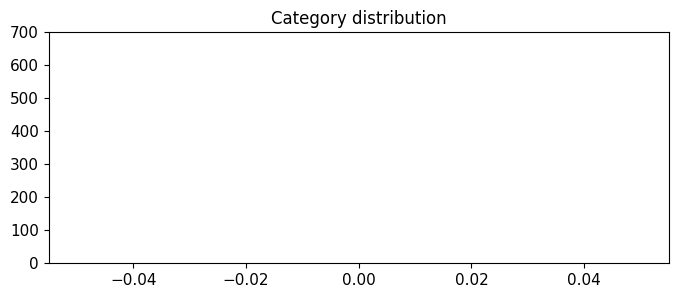

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
